<img src="Titulo3.png" alt="Título" width="100%" height="auto">

# <span style="color:darkblue">Resumen</span>

En este proyecto se analizan los sismos ocurridos en México desde el año 1900 hasta 2022, se observa su distribución espacial en los distintos estados de la república así como su relación con las placas tectónicas.

# <span style="color:darkblue">Herramientas</span>

* Python
    1. siuba 
    2. siuba.dply.vector 
    3. plotnine
    4. pandas y numpy.

# <span style="color:darkblue">Introducción</span>

México es un país altamente sísmico debido a su ubicación en el Anillo de Fuego del Pacífico, una región geológicamente activa donde se encuentran varias placas tectónicas. En este proyecto estudiamos la distribución espacial de los sismos ocurridos en México desde 1900 a la fecha, conocer las características sísmicas del país permite la construcción de edificios y estructuras más resistentes, que pueden soportar mejor los movimientos telúricos así como una planificación adecuada de ciudades y comunidades, garantizando que se eviten áreas de alto riesgo y se implementen medidas de seguridad adecuadas ya que a la fecha predecir la aparición de este tipo de fenómenos sigue siendo un reto.

En la sección data se encuentra un archivo llamado sismos.csv, el cual contiene la tabla de datos de los sismos ocurridos desde el año 1900 en México hasta 2022. La tabla posee información acerca de los sismos como lo es la <code>Fecha</code>, la <code>Hora</code>, la <code>Magnitud</code> en escala richter, la <code>Latitud</code>, <code>Longitud</code>, <code>municipio</code>, <code>entidad</code>, entre otros.

# <span style="color:darkblue">Preprocesamiento de datos</span>

Realizamos la importación de librerías necesarias

In [ ]:
import pandas as pd             # Importar libreria pandas 
import numpy as np              # Libreria numpy 
import plotnine as p9
from plotnine import *          # Libreria plotnine
from siuba import *             # Libreria siuba
from siuba.dply.vector import * # Importar algunas funciones necesarias

Realizamos la lectura del archivo

In [27]:
# Leemos el archivo de datos
#sismos = pd.read_csv("C:\\Users\\Martin\\OneDrive\\Documentos\\Python Scripts\\sismos.csv")
sismos = pd.read_csv("sismos.csv", encoding='latin-1')
mapa_mexico = pd.read_csv("Mexico_division_politica.csv", encoding='latin-1')
placas = pd.read_csv("Mexico_placas_tectonicas.csv", encoding='latin-1')
sismos >> head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia.de.localizacion,municipio,entidad,zona,mes,placas
0,20/01/1900,00:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL","AUTLAN DE NAVARRO, JAL",JAL,Oeste,1,Rivera
1,16/05/1900,14:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL","AUTLAN DE NAVARRO, JAL",JAL,Oeste,5,Rivera
2,05/03/1901,04:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS","LA PAZ, BCS",BCS,Noroeste,3,Pacífico
3,08/12/1901,20:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN","AHOME, SIN",SIN,Noroeste,12,Norteamérica
4,16/01/1902,17:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO","ZUMPANGO DEL RIO, GRO",GRO,Suroeste,1,Cocos


In [4]:
sismos.tail()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia.de.localizacion,municipio,entidad,zona,mes,placas
242517,19/09/2022,17:57:06,4.2,18.05,-103.30,16.0,"82 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera
242518,19/09/2022,18:00:06,4.0,17.98,-103.30,16.0,"90 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera
242519,19/09/2022,19:09:03,4.1,18.24,-102.97,14.0,"62 km al SURESTE de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera
242520,19/09/2022,21:16:13,4.1,18.01,-103.26,16.0,"85 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera
242521,19/09/2022,21:23:41,4.1,17.98,-103.24,6.0,"89 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera


# <span style="color:darkblue">Análisis de datos</span>

Vamos a añadir una nueva columna a la tabla anterior llamada Intensidad, la cual será Fuerte si la magnitud del sismo es mayor que 6 y débil en caso contrario. 

In [32]:
sismos = sismos >> mutate(Intensidad = np.where(_.Magnitud > 6, 'Fuerte', 'Debil'))
sismos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia.de.localizacion,municipio,entidad,zona,mes,placas,Intensidad
0,20/01/1900,00:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL","AUTLAN DE NAVARRO, JAL",JAL,Oeste,1,Rivera,Fuerte
1,16/05/1900,14:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL","AUTLAN DE NAVARRO, JAL",JAL,Oeste,5,Rivera,Fuerte
2,05/03/1901,04:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS","LA PAZ, BCS",BCS,Noroeste,3,Pacífico,Fuerte
3,08/12/1901,20:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN","AHOME, SIN",SIN,Noroeste,12,Norteamérica,Fuerte
4,16/01/1902,17:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO","ZUMPANGO DEL RIO, GRO",GRO,Suroeste,1,Cocos,Fuerte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242517,19/09/2022,17:57:06,4.2,18.05,-103.30,16.0,"82 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera,Debil
242518,19/09/2022,18:00:06,4.0,17.98,-103.30,16.0,"90 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera,Debil
242519,19/09/2022,19:09:03,4.1,18.24,-102.97,14.0,"62 km al SURESTE de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera,Debil
242520,19/09/2022,21:16:13,4.1,18.01,-103.26,16.0,"85 km al SUR de COALCOMAN, MICH","COALCOMAN, MICH",MICH,Oeste,9,Rivera,Debil


# <span style="color:darkblue">Gráficas</span>

Vamos a realizar un gráfico de cajas que nos indique en donde se encuentran ubicados la mayoría de los datos alrededor de la mediana, es decir el segundo y tercer cuartil.

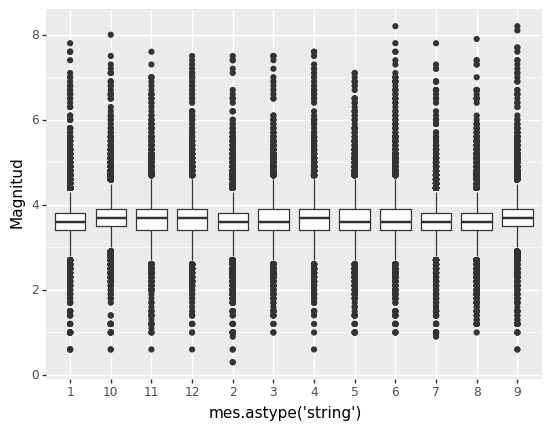

<ggplot: (124867032161)>

In [7]:
(ggplot() + 
            geom_boxplot(data = sismos,
                        mapping = aes(x = "mes.astype('string')", y = "Magnitud")) 
)

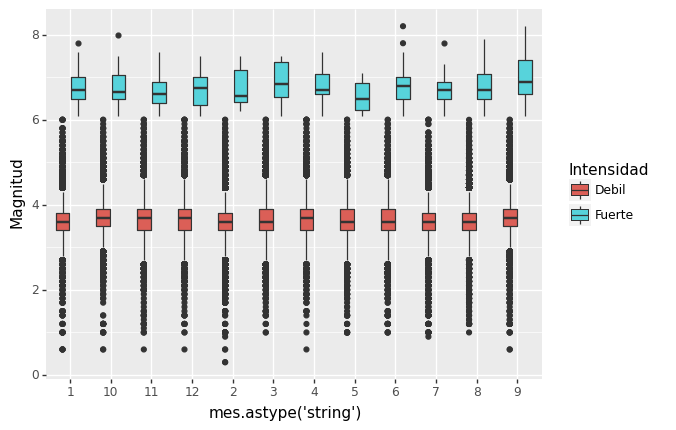

<ggplot: (124869565456)>

In [8]:
(ggplot() + 
            geom_boxplot(data = sismos,
                        mapping = aes(x = "mes.astype('string')", y = "Magnitud", fill = "Intensidad")) 
)

Se observa mucha variabilidad en los sismos fuertes porque la mediana no se ubica en el centro de la caja, en los sismos debiles se observa que la mayoría de los datos se ubican alrededor de 3.8 grados.

Realizamos el mismo analisis pero ahora separando por placas tectónicas.

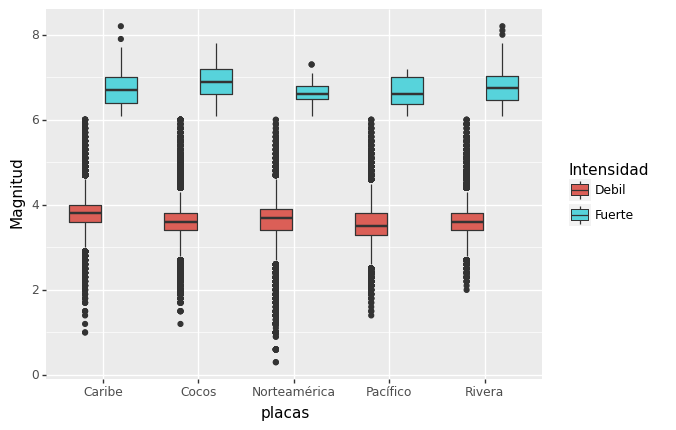

<ggplot: (124868024061)>

In [9]:
(ggplot() + 
            geom_boxplot(data = sismos,
                        mapping = aes(x = "placas", y = "Magnitud", fill = "Intensidad")) 
)

Podemos notar que en la placa de Norteamérica hay muy poca variabilidad en los sismos fuertes ya que la caja tiene un grosor muy delgado, vamos a quedarnos solamente con los sismos de intensidades fuertes.

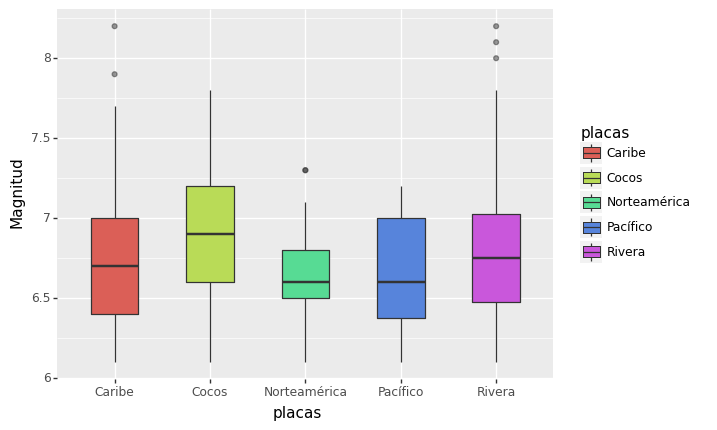

<ggplot: (124866890066)>

In [15]:
(ggplot() + 
            geom_boxplot(data = sismos >> filter(_.Intensidad == "Fuerte"),
                        mapping = aes(x = "placas", y = "Magnitud", fill = "placas"),
                        width = 0.5, # Grosor de las cajas
                        outlier_alpha = 0.5) # Transparencia de los atipicos
)

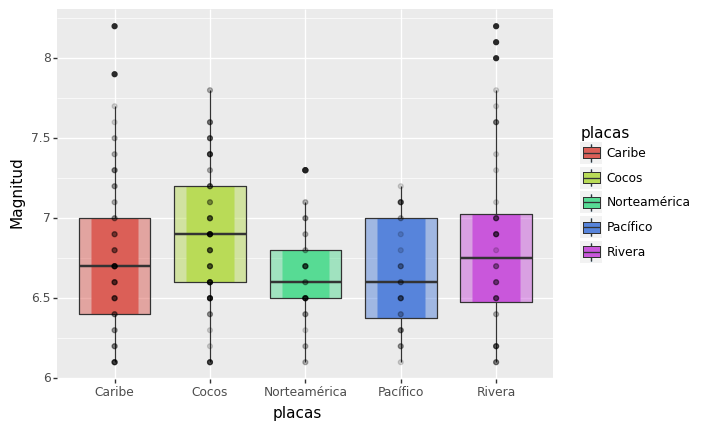

<ggplot: (124867903531)>

In [22]:
(ggplot() + 
            geom_boxplot(data = sismos >> filter(_.Intensidad == "Fuerte"),
                        mapping = aes(x = "placas", y = "Magnitud", fill = "placas"),
                        width = 0.5,
                        color = None) +
            geom_boxplot(data = sismos >> filter(_.Intensidad == "Fuerte"),
                        mapping = aes(x = "placas", y = "Magnitud", fill = "placas"),
                        outlier_alpha = 1, 
                        alpha = 0.5) +
             geom_point(data = sismos >> filter(_.Intensidad == "Fuerte"),
                        mapping = aes(x = "placas", y = "Magnitud"), 
                        alpha = 0.15)
)

Los puntos indican los sismos fuertes que ocurrieron en cada una de las placas, los puntos oscuros indican muchos sismos mientras que los puntos transparentes indican pocas repeticiones de sismos.

Vamos a calcular cuantos sismos hay por placas, cual es el promedio y la desviación estandar, así como el valor del minimo, máximo, primer, segundo y tercer cuartil de nuestros datos.

In [24]:
(sismos >> filter(_.Intensidad == "Fuerte") >> select(_.Magnitud, _.placas) >> group_by(_.placas)).describe()

Magnitud                                                  
                count      mean       std  min    25%   50%    75%  max
placas                                                                 
Caribe           69.0  6.749275  0.478854  6.1  6.400  6.70  7.000  8.2
Cocos            89.0  6.870787  0.438023  6.1  6.600  6.90  7.200  7.8
Norteamérica     39.0  6.641026  0.297107  6.1  6.500  6.60  6.800  7.3
Pacífico         32.0  6.643750  0.335951  6.1  6.375  6.60  7.000  7.2
Rivera           48.0  6.845833  0.572400  6.1  6.475  6.75  7.025  8.2

Vamos a observar la distribución espacial de los sismos fuertes en los estados de la republica mexicana en el siguiente gráfico, las divisiones verdes representan las placas tectónicas.

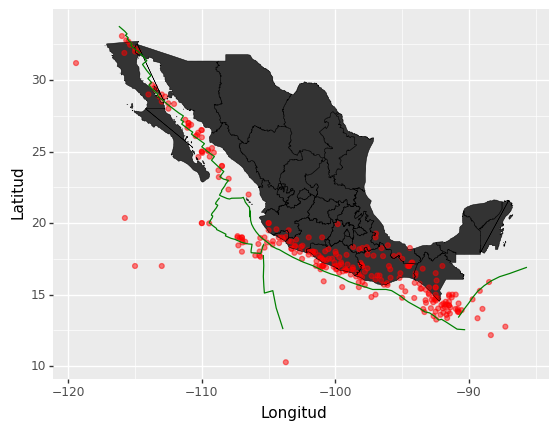

<ggplot: (124866238477)>

In [39]:
(ggplot() + 
            geom_polygon(data = mapa_mexico,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Grupo")) +
            geom_point(data = sismos >> filter(_.Intensidad == "Fuerte"),
                        mapping = aes(x = "Longitud", y = "Latitud"), color = "red", alpha = 0.5) +
 geom_polygon(data = mapa_mexico,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Grupo"), fill = None, color = "black", size = 0.2) +
             geom_path(data = placas,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Tipo"), color = "green")
)

Vamos a observar la distribución espacial de todos los sismos.

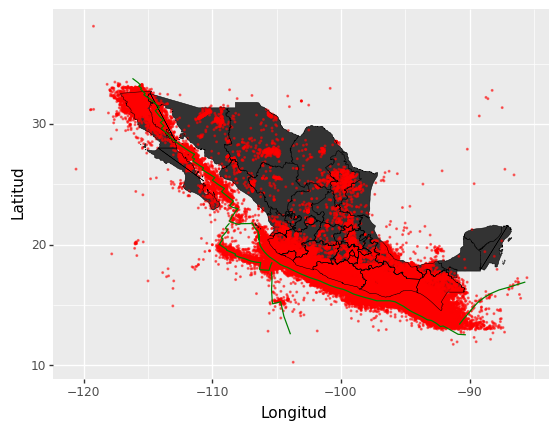

<ggplot: (124885742752)>

In [41]:
(ggplot() + 
            geom_polygon(data = mapa_mexico,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Grupo")) +
            geom_point(data = sismos,
                        mapping = aes(x = "Longitud", y = "Latitud"), color = "red", alpha = 0.5, size = 0.2) +
 geom_polygon(data = mapa_mexico,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Grupo"), fill = None, color = "black", size = 0.2) +
             geom_path(data = placas,
                        mapping = aes(x = "Longitud", y = "Latitud", group = "Tipo"), color = "green")
)

Podemos observar que la mayoría de los sismos, tanto fuertes como débiles ocurren entre la Placa de Norteamérica y la Placa de Cocos.